In [1]:
import numpy as np
import h5py
from matplotlib import pyplot as plt
import os

%matplotlib inline

In [2]:
data = []
for root, dirs, filenames in os.walk('challenge_dataset/'):  # adapt path
    for file in filenames:
        data.append(h5py.File(f'{root}{file}'))

In [7]:
print(f'Data shape : \n'
      f'Raws : {data[0]["raw"].shape}\n'
      f'Labels : {data[0]["label"].shape}\n'
      f'Data type : \n'
      f'Raws : {data[0]["raw"].dtype}\n'
      f'Labels : {data[0]["label"].dtype}')

Data shape : 
Raws : (64, 192, 192)
Labels : (64, 192, 192)
Data type : 
Raws : uint8
Labels : uint8


In [3]:
# Is there 1 and only 1 aneurysm per sample ?
no_aneurysm_samples = 0
multiple_aneurysms = 0

for sample_idx, sample in enumerate(data):
    max_arr = np.zeros(shape=len(sample['label']))
    for lab_idx, label in enumerate(sample['label']):
        max_arr[lab_idx] = label.max()
    labeled = np.trim_zeros(max_arr)
    if labeled.size == 0:
        print(f'At sample {sample_idx}, there is no aneurysm')
        no_aneurysm_samples += 1
    if labeled.min() == 0:
        print(f'At sample {sample_idx}, there is more than one aneurysm')
        multiple_aneurysms += 1

print(f'\nTotal irregular samples : {no_aneurysm_samples + multiple_aneurysms}\n'
      f'Samples with no aneurysm : {no_aneurysm_samples}\n'
      f'Samples with more than one aneurysm : {multiple_aneurysms}')

At sample 5, there is more than one aneurysm
At sample 8, there is more than one aneurysm
At sample 12, there is more than one aneurysm
At sample 23, there is more than one aneurysm
At sample 25, there is more than one aneurysm
At sample 27, there is more than one aneurysm
At sample 39, there is more than one aneurysm
At sample 45, there is more than one aneurysm
At sample 56, there is more than one aneurysm
At sample 58, there is more than one aneurysm
At sample 72, there is more than one aneurysm
At sample 80, there is more than one aneurysm
At sample 93, there is more than one aneurysm
At sample 95, there is more than one aneurysm
At sample 102, there is more than one aneurysm

Total irregular samples : 15
Samples with no aneurysm : 0
Samples with more than one aneurysm : 15


In [4]:
def view_sample(imgs, idx, kind='raw'):
    """
    View an entire sample given an index.
    :param imgs: data
    :param idx: index of sample
    :param kind: 'raw' for brain image, 'label' for aneurysm label
    :return: None
    """
    _, _ax = plt.subplots(8, 8, figsize=(64, 64))

    for i in range(8):
        for j in range(8):
            _ax[i][j].imshow(imgs[idx][kind][8 * i + j], cmap='gray')

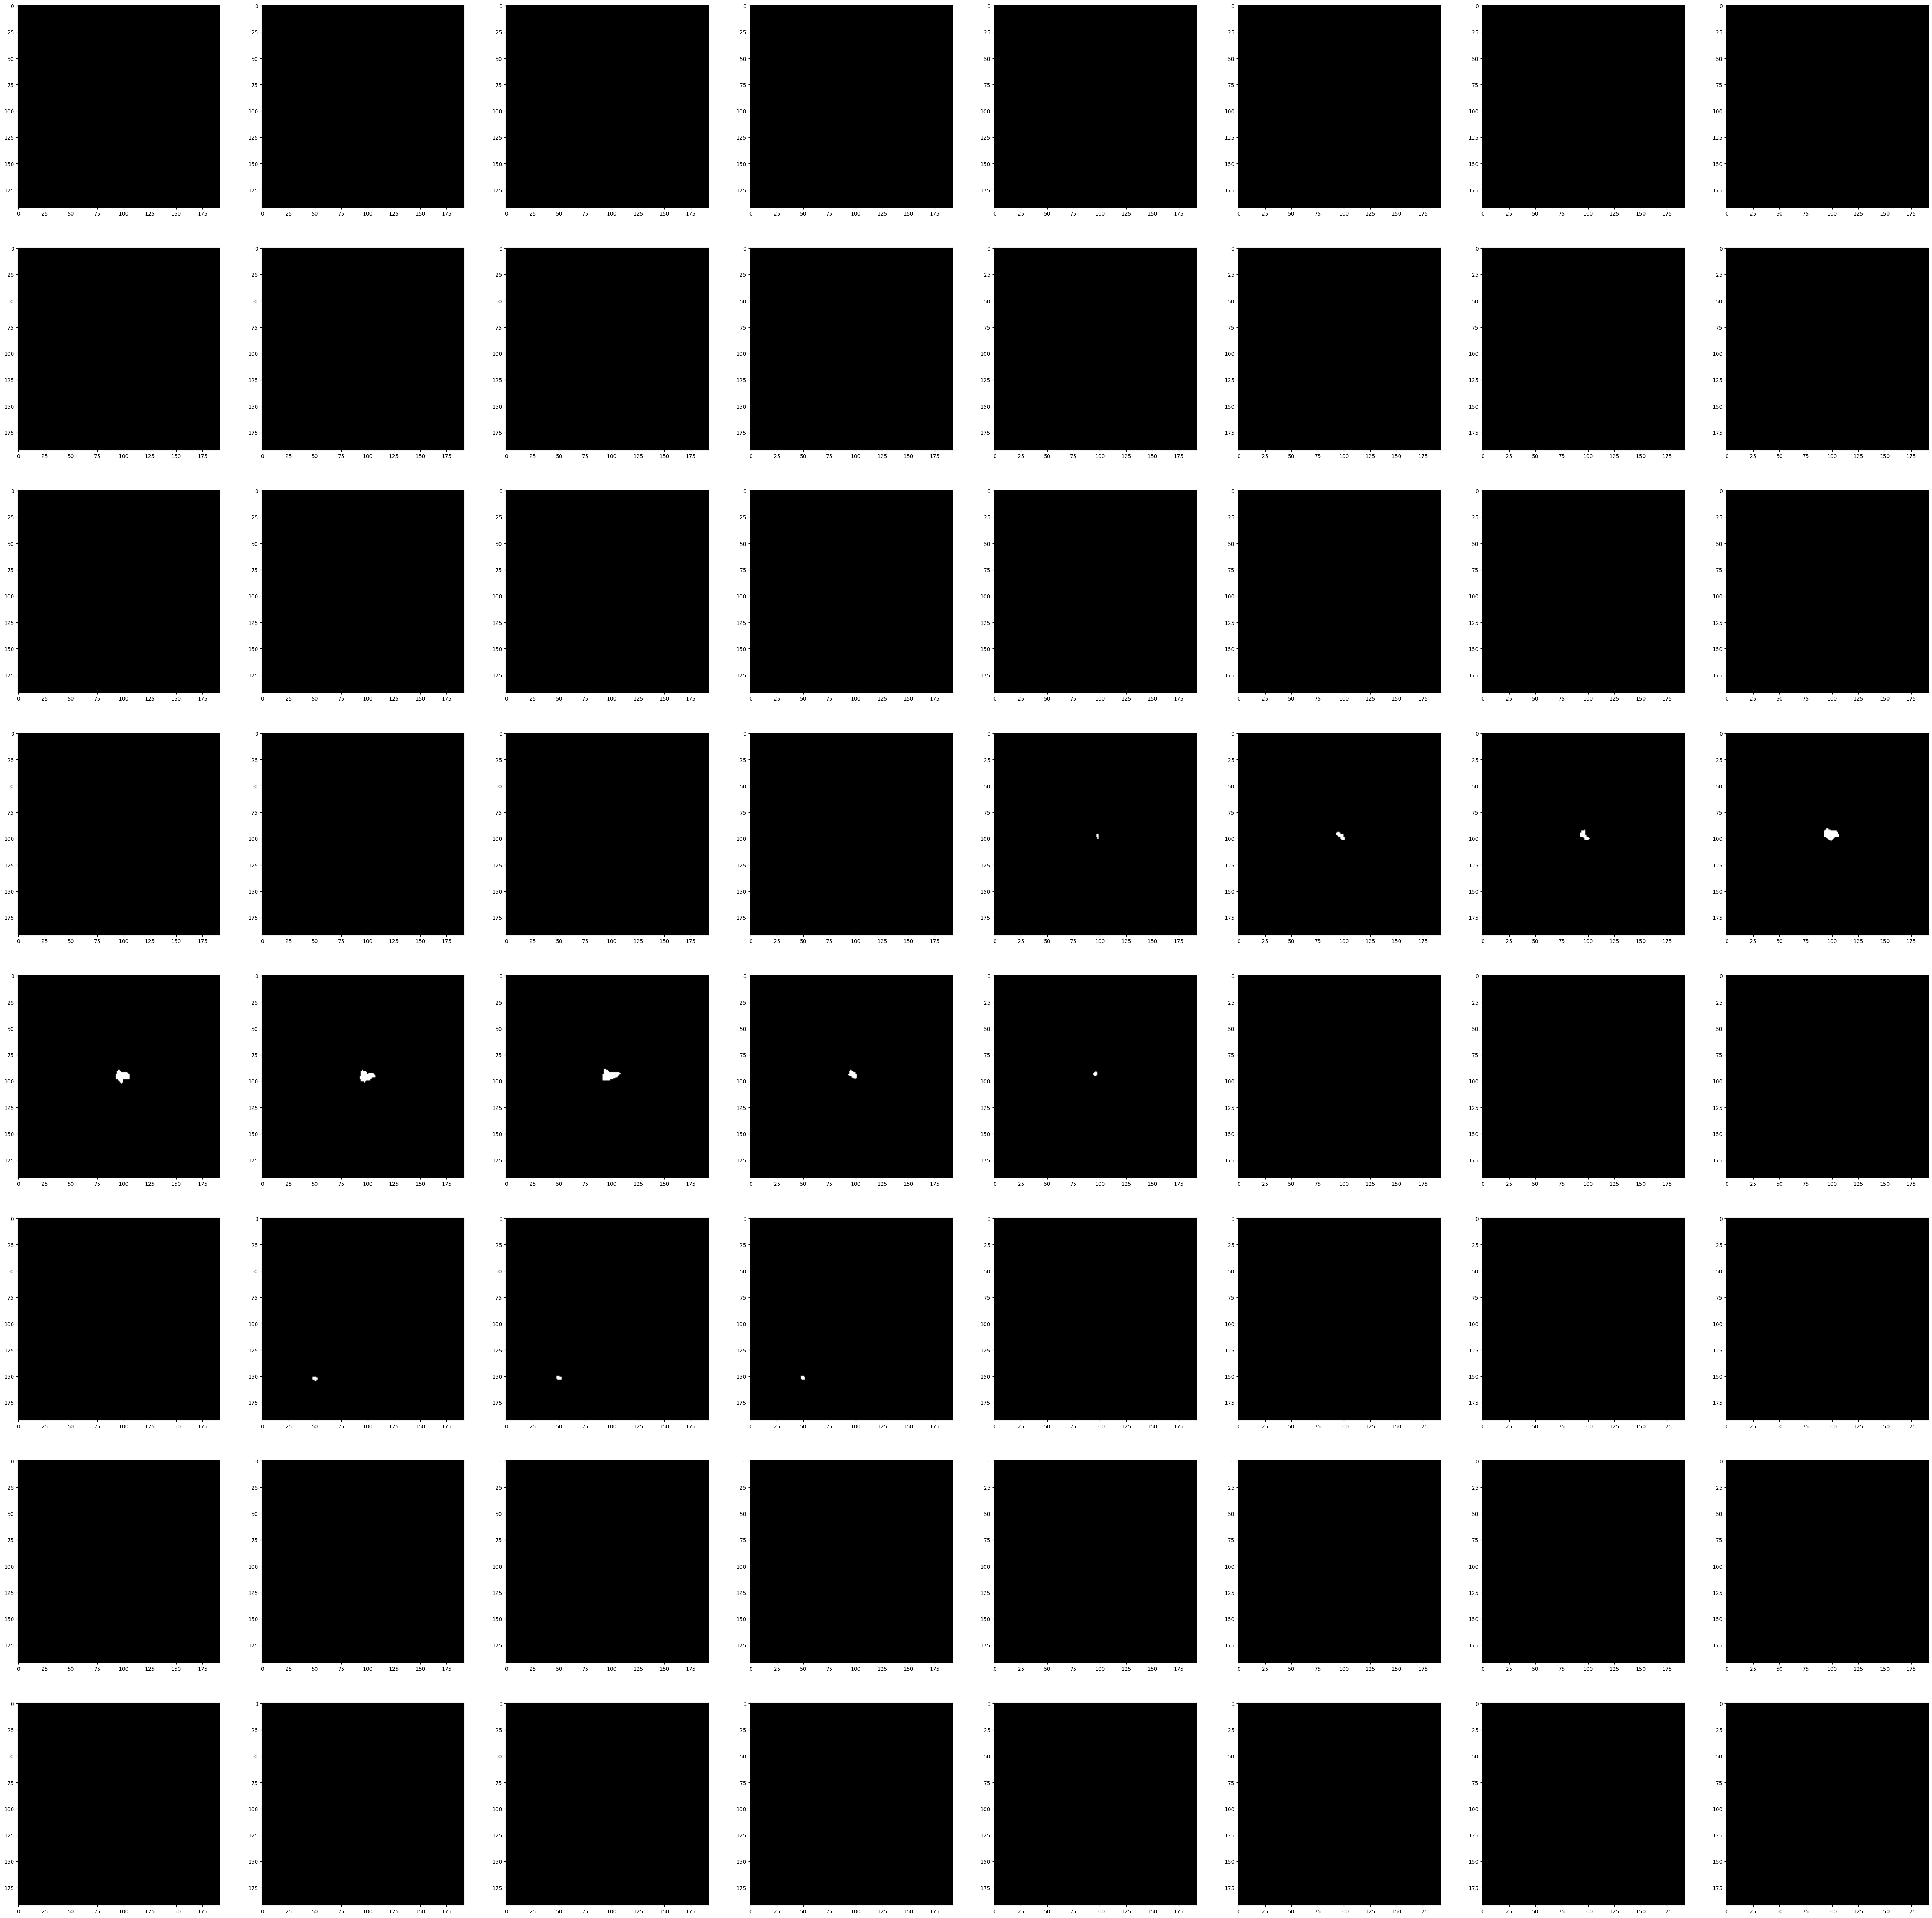

In [5]:
view_sample(data, 5, 'label')

In [ ]:
def show_aneurysm(imgs, idx: int, plot_size=6, img_cmap='gray', label_cmap='gray'):
    """
    Given an index, plot images of the aneurysm
    :param imgs: List of hdf5 data
    :param idx: int in [0, 105]
    :param plot_size: int, size of each square subplot
    :param label_cmap: str or matplotlib color map object
    :param img_cmap: str or matplotlib color map object
    :return: None
    """

    raws, labels = imgs[idx]['raw'], imgs[idx]['label']
    i_min, i_max = 0, -1

    # Find first nonzero label
    for i, label in enumerate(labels):
        if label.max() != 0:
            i_min = i
            break

    # Find last nonzero label
    for i, label in enumerate(reversed(labels)):
        if label.max() != 0:
            i_max = -i
            break

    # Take 1 image before and after the labeled aneurysm
    if i_min != 0:
        i_min -= 1
    if i_max != -1:
        i_max += 1
    i_max = len(labels) + i_max

    n_imgs = i_max - i_min + 1
    _, axes = plt.subplots(n_imgs, 2, figsize=(plot_size, n_imgs * plot_size//2))
    for i in range(n_imgs):
        axes[i][0].imshow(data[idx]['raw'][i + i_min], cmap=img_cmap)
        axes[i][1].imshow(data[idx]['label'][i + i_min], cmap=label_cmap)

In [ ]:
show_aneurysm(data, 0, plot_size=8)